# Linear Discriminant  analysis for a 2D dataset

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris  
iris=load_iris()
feature_name=iris.feature_names[:2]
#considering the first two features  sepal_length and sepal_width
X=iris.data[:,:2]
#  y contain three categories label as 0,1,2
y=iris.target  
df=pd.DataFrame(X,columns=feature_name)
df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [7]:
#calculate the mean vector for each of the category 
m0=np.mean(X[y==0],axis=0)
m1=np.mean(X[y==1],axis=0)
m2=np.mean(X[y==2],axis=0)

In [8]:
# prior probability (just the proprtaion of each category in the given dataset in this case it is same since each category have 50 samples )
p0=np.mean(y==0)
p1=np.mean(y==1)
p2=np.mean(y==2)


In [9]:
#  calculating the covariance matrics for each class 
c0=np.cov(X[y==0].T)
c1=np.cov(X[y==1].T)
c2=np.cov(X[y==2].T)
print(c0)

[[0.12424898 0.09921633]
 [0.09921633 0.1436898 ]]


In [10]:
# since the assumption for the lda was the covariance matrics for each class should be same but  in practice it is not always exactly same so we use a weighted covariance matrics also called the pooled matrics 
#  sklearn also use the concept of the pooled covariance matrics 
p_c= (c0 * (len(X[y == 0]) - 1) + c1 * (len(X[y == 1]) - 1) + c2 * (len(X[y == 2]) - 1)) / (len(X) - 3)  
p_c_inv=np.linalg.inv(p_c)

In [11]:
#  defining the discriminant function for lda 
def dec(X,m,p_c_inv,prior):
     return X @ p_c_inv @ m - 0.5 * m.T @ p_c_inv @ m + np.log(prior)
# for each point  i am going to find the value  of discriminant function corresponding to each class the class with maximum discriminant value will be the class of that point
def predict(X):
 g0_vals=np.array([dec(x,m0,p_c_inv,p0) for x in X ]) 
 g1_vals=np.array([dec(x,m1,p_c_inv,p1) for x in X])
 g2_vals=np.array([dec(x,m2,p_c_inv,p2) for x in X])  
#  in next step finding the maximum values of descriminant function for each point 
 return np.argmax(np.array([g0_vals,g1_vals,g2_vals]),axis=0)
   
    


In [12]:
y_pred =predict(X)  

In [13]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1])

 #  drawing the decesion boundry mannually using meshgrid function of numpy 

In [14]:
x_min, x_max = X[:, 0].min()-1 , X[:, 0].max()+1 
y_min, y_max = X[:, 1].min()-1 , X[:, 1].max()+1 
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),np.linspace(y_min, y_max, 100))
#  ravel function flatten an array to 1 to 
#  np.c_ it concetinataes two arrays columnwise 
grid = np.c_[xx.ravel(), yy.ravel()]

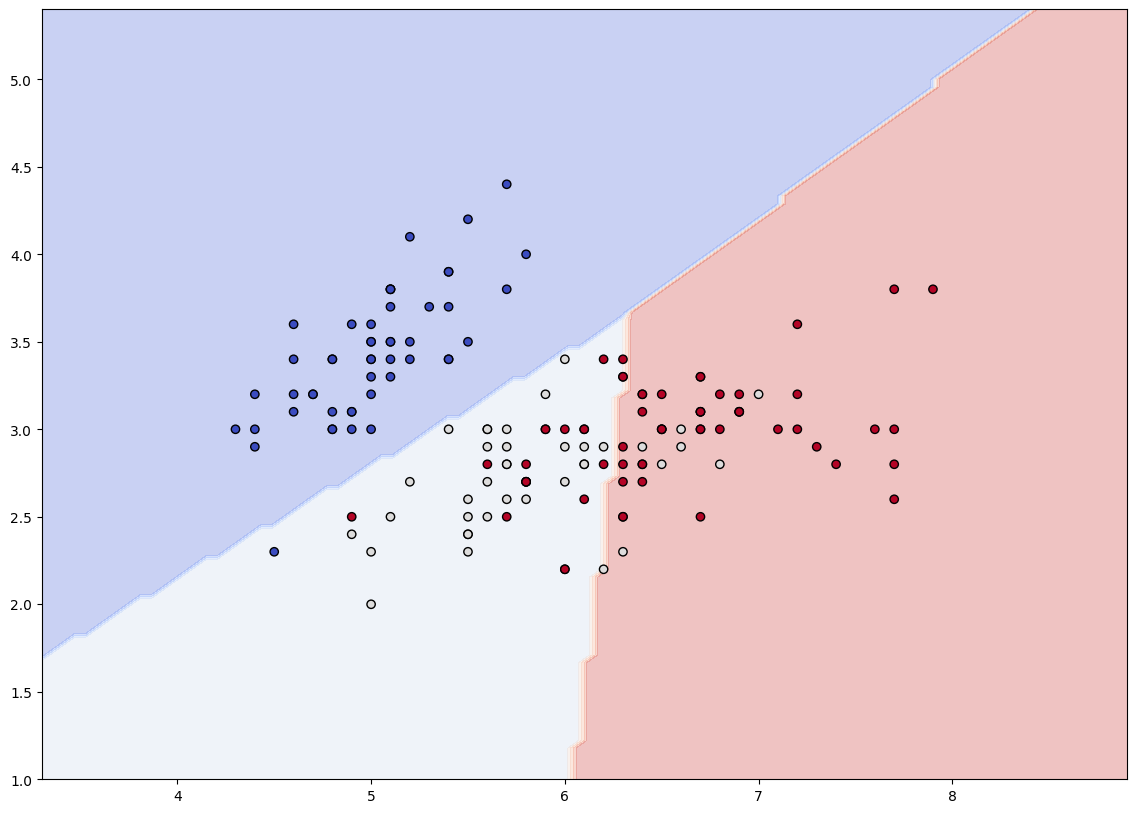

In [15]:
z=predict(grid).reshape(xx.shape)
#  for plottting the decsion boundry 
fig, ax = plt.subplots(1, figsize=(14, 10))
ax.contourf(xx, yy, z, alpha=0.3, cmap=plt.cm.coolwarm)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
plt.show() 

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y,y_pred)
print("the accuracy score of this model is : ",accuracy_score)

the accuracy score of this model is :  0.8


#  quadratic discriminent analysis for iris dataset

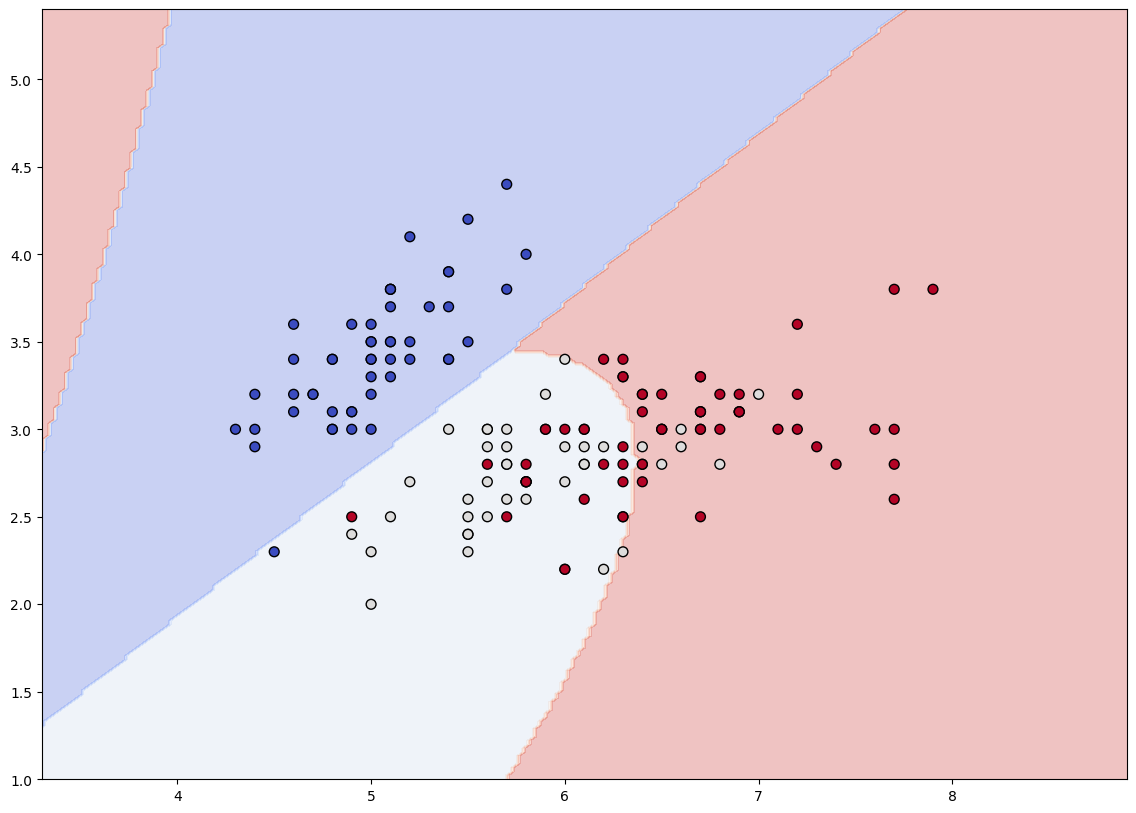

In [12]:
# Number of classes
classes = np.unique(y)
n_classes = len(classes)

# Calculate class-wise means, covariances, and priors
means = []
covariances = []
priors = []

for c in classes:
    X_c = X[y == c]
    means.append(np.mean(X_c, axis=0))
    covariances.append(np.cov(X_c.T))
    priors.append(len(X_c) / len(X))

means = np.array(means)
covariances = np.array(covariances)
priors = np.array(priors)

# Precompute inverse and determinant of covariance for each class
inv_covs = []
det_covs = []
for cov in covariances:
    inv_covs.append(np.linalg.inv(cov))
    det_covs.append(np.linalg.det(cov))
inv_covs = np.array(inv_covs)
det_covs = np.array(det_covs)

# QDA discriminant function for one sample x and class c
def g(x, c):
    diff = x - means[c]
    inv_cov = inv_covs[c]
    det_cov = det_covs[c]
    prior = priors[c]
    term1 = -0.5 * np.log(det_cov)
    term2 = -0.5 * diff.T @ inv_cov @ diff
    term3 = np.log(prior)
    return term1 + term2 + term3

# Predict function for multiple samples
def predict1(X_test):
    preds = []
    for x in X_test:
        scores = [g(x, c) for c in classes]
        preds.append(np.argmax(scores))
    return np.array(preds)
   

# Create meshgrid for plotting decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Flatten grid to pass to predict
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = predict1(grid_points)
Z = Z.reshape(xx.shape)

# Plotting
fig, ax = plt.subplots(figsize=(14,10))

# Decision boundary
contour = ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Scatter plot of original data points
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=50)




plt.show()


In [15]:
from sklearn.metrics import accuracy_score
y_pred1=predict1(X)


accuracy_score1=accuracy_score(y,y_pred1)
print("the accuracy score for QDA model is : ",accuracy_score(y,y_pred1))


the accuracy score for QDA model is :  0.8
